<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Avacado Production

- [Avacado Production Worldwide](https://ourworldindata.org/grapher/avocado-production)
- [California Avocado Production 1980-2020](https://www.kaggle.com/datasets/jarredpriester/california-avocado-production-19802020)
- [3 datasets on Dataworld](https://data.world/datasets/avocados)
- [GitHub Topic on Avacado](https://github.com/topics/avocado-dataset)
- [Statista Avacado production worldwide](https://www.statista.com/statistics/577455/world-avocado-production/)
-[Hass Avocados R Package](https://cran.r-project.org/web/packages/avocado/vignettes/a_intro.html)
- [Avacado Source](https://www.avocadosource.com/)
- [Hass Avacado Board](https://hassavocadoboard.com/)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

### Table of Contents <a class="anchor" id="AVA_toc"></a>

* [Table of Contents](#AVA_toc)
    * [Page 1 - Abstract](#AVA_page_1)
    * [Page 2 - Imported Libraries](#AVA_page_2)
    * [Page 3 - Import the Dataset](#AVA_page_3)
    * [Page 4 - Setting Notebook Options](#AVA_page_4)
    * [Page 5 - Looking at the Data](#AVA_page_5)
    * [Page 6 - Get Descriptive Statistics about the Dataset](#AVA_page_6)
    * [Page 7 - Filter for Three Cities](#AVA_page_7)
    * [Page 8 - Recoding](#AVA_page_8)
    * [Page 9 - Test for Assumptions](#AVA_page_9)
    * [Page 10 - Correlation analysis](#AVA_page_10)
    * [Page 11 - Regression analysis](#AVA_page_11)
    * [Page 12 - T-tests](#AVA_page_12)
    * [Page 13 - Chi-squared test](#AVA_page_13)
    * [Page 14 - Time-series analysis](#AVA_page_14)
    * [Page 15 - Summary](#AVA_page_15)
    * [Page 16 - Future Work](#AVA_page_16)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 1 - Abstract <a class="anchor" id="AVA_page_1"></a>

[Back to Top](#AVA_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

Research on Avacado Production

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 2 - Imported Libraries<a class="anchor" id="AVA_page_2"></a>

[Back to Top](#AVA_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bartlett, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

import warnings
warnings.filterwarnings("ignore")

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 3 - Import the Dataset <a class="anchor" id="AVA_page_3"></a>

[Back to Top](#AVA_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

## Research, find datasets and read in your data
We found three datasets to work on, we'll work on the first:

- [USA 2015-2018](../Data/avocados-us-2015-1018.csv)

This dataset contains information about avocado sales in various regions from 2015 to 2018. Here are some interesting descriptive statistics that can be derived from this dataset:

1. The average price of avocados across all regions and years.
2. The total volume of avocados sold across all regions and years.
3. The total volume of each type of avocado sold (4046, 4225, 4770) across all regions and years.
4. The average price of avocados in each region and for each year.
5. The total number of bags sold across all regions and years, and the proportion of each type of bag (small, large, XL) sold.
6. The number of avocados sold in each region and for each year.
7. The distribution of avocado prices for each region and for each year.

here are the other two:
- [Worldwide 1961-2020](../Data/avocado-production-worldwide-1961-2021.csv)
- [California 1980-2020](../Data/avocados-california-1980-2020.csv)

In [15]:
### start code
df = pd.read_csv('../Data/avocados-us-2015-1018.csv')
df = df.iloc[:,1:]
df.head()
### end code

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 4 - Setting Notebook Options<a class="anchor" id="AVA_page_4"></a>

[Back to Top](#AVA_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

#### Check number of rows and columns

In [3]:
print(f'Rows: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')

Rows: 18249
Columns: 13


In [4]:
# reset the options
#pd.reset_option('display.max_rows')

# set the option to display the maximum number of columns
pd.set_option('display.max_columns', 20)

# set the option to display the minimum and maximum number of rows
pd.set_option('display.min_rows', 200)
pd.set_option('display.max_rows', 1000)

pd.describe_option('display.max_rows')
pd.describe_option('display.max_columns')

display.max_rows : int
    If max_rows is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 and pandas will auto-detect
    the height of the terminal and print a truncated object which fits
    the screen height. The IPython notebook, IPython qtconsole, or
    IDLE do not run in a terminal and hence it is not possible to do
    correct auto-detection.
    [default: 60] [currently: 1000]
display.max_columns : int
    If max_cols is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 and pandas will auto-detect
    the width of the t

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 5 - EDA: Looking at the Data<a class="anchor" id="AVA_page_5"></a>

[Back to Top](#AVA_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

In [4]:
# check the column names 
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [5]:
#print unique values for type column
df.type.unique()

array(['conventional', 'organic'], dtype=object)

In [6]:
#print unique values for region column
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [7]:
df.region.describe()

count      18249
unique        54
top       Plains
freq         338
Name: region, dtype: object

In [8]:
df.AveragePrice.describe()

count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64

In [9]:
# usually objects are you key factors/independent variables where floats and ints are continuous/dependent variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [16]:
# notice that the Date column is an object and not a proper date object let's create a new column as a date object
# convert string column to date column
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

In [14]:
# this is a large dataset and will be truncated to 11 rows unless you set your row and column options
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Date_Object
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015-12-27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015-12-20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015-12-13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015-12-06
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015-11-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2018-02-04
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,2018-01-28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,2018-01-21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,2018-01-14


<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 6 - Get Descriptive Statistics about the Dataset<a class="anchor" id="AVA_page_6"></a>

[Back to Top](#AVA_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


In [17]:
#What is the average price of avocados across all regions and years.

# Calculate the mean of the 'AveragePrice' column
average_price = df["AveragePrice"].mean()

print("The average price of avocados across all regions and years is:", average_price)

The average price of avocados across all regions and years is: 1.4059784097758825


In this code, we first import the pandas library and read the avocado dataset into a pandas DataFrame. We then use the mean() method to calculate the average of the 'AveragePrice' column, which gives us the average price of avocados across all regions and years. Finally, we print out the result using the print() function.



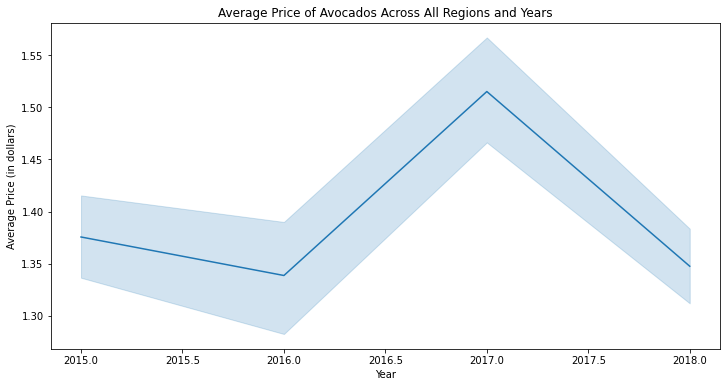

In [18]:
# Group the DataFrame by 'year' and 'region' and calculate the mean of the 'AveragePrice' column for each group
avg_price_by_region_year = df.groupby(['year', 'region'])['AveragePrice'].mean()

# Reset the index of the resulting DataFrame
avg_price_by_region_year = avg_price_by_region_year.reset_index()

# Set the size of the figure using matplotlib
plt.figure(figsize=(12, 6))

# Create a line plot of the average price of avocados across all regions and years
sns.lineplot(data=avg_price_by_region_year, x='year', y='AveragePrice')

# Set the title of the plot
plt.title('Average Price of Avocados Across All Regions and Years')

# Set the labels of the x- and y-axes
plt.xlabel('Year')
plt.ylabel('Average Price (in dollars)')

# Show the plot
plt.show()

In this code, we use the pd.read_csv() function to load the avocado dataset into a pandas DataFrame. We then use the groupby() method to group the DataFrame by 'year' and 'region' and calculate the mean of the 'AveragePrice' column for each group. We store this object in the variable avg_price_by_region_year.

Next, we use the reset_index() method to reset the index of the resulting DataFrame to integers. This is necessary to plot the DataFrame with seaborn.

We then use the plt.figure(figsize=(12, 6)) statement to set the size of the figure using matplotlib.

We then call the seaborn.lineplot() function to create a line plot of the average price of avocados across all regions and years, with the x parameter set to 'year' and the y parameter set to 'AveragePrice'.

Finally, we set the title of the plot using plt.title(), set the labels of the x- and y-axes using plt.xlabel() and plt.ylabel(), and show the plot using plt.show().

In [19]:
# What is the total volume of avocados sold across all regions and years.

# Calculate the sum of the 'Total Volume' column
total_volume = df["Total Volume"].sum()

print("The total volume of avocados sold across all regions and years is:", total_volume)

The total volume of avocados sold across all regions and years is: 15523402593.400002


In this code, we first import the pandas library and read the avocado dataset into a pandas DataFrame. We then use the sum() method to calculate the sum of the 'Total Volume' column, which gives us the total volume of avocados sold across all regions and years. Finally, we print out the result using the print() function.

In [20]:
# What is the total volume of each type of avocado sold (4046, 4225, 4770) across all regions and years.
# Calculate the sum of the '4046', '4225', and '4770' columns
total_4046 = df["4046"].sum()
total_4225 = df["4225"].sum()
total_4770 = df["4770"].sum()

print("The total volume of 4046 avocados sold is:", total_4046)
print("The total volume of 4225 avocados sold is:", total_4225)
print("The total volume of 4770 avocados sold is:", total_4770)

The total volume of 4046 avocados sold is: 5347110739.26
The total volume of 4225 avocados sold is: 5386275717.93
The total volume of 4770 avocados sold is: 416802342.12999994


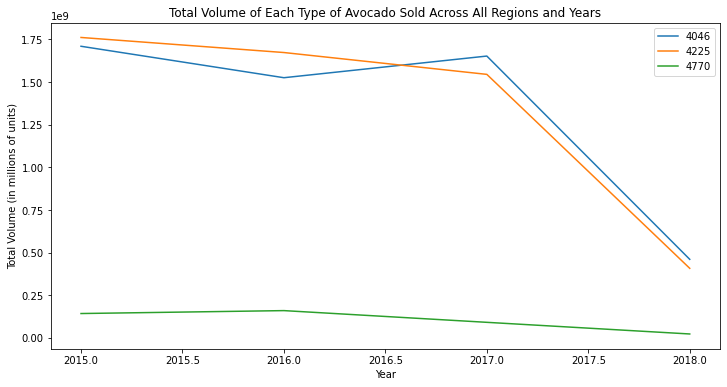

In [21]:
# Group the DataFrame by 'year' and sum the values of the '4046', '4225', and '4770' columns for each group
total_volume_by_type_year = df.groupby('year')[['4046', '4225', '4770']].sum()

# Reset the index of the resulting DataFrame
total_volume_by_type_year = total_volume_by_type_year.reset_index()

# Set the size of the figure using matplotlib
plt.figure(figsize=(12, 6))

# Create a line plot of the total volume of each type of avocado sold for each year
plt.plot(total_volume_by_type_year['year'], total_volume_by_type_year['4046'], label='4046')
plt.plot(total_volume_by_type_year['year'], total_volume_by_type_year['4225'], label='4225')
plt.plot(total_volume_by_type_year['year'], total_volume_by_type_year['4770'], label='4770')

# Set the title of the plot
plt.title('Total Volume of Each Type of Avocado Sold Across All Regions and Years')

# Set the labels of the x- and y-axes
plt.xlabel('Year')
plt.ylabel('Total Volume (in millions of units)')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [22]:
# The average price of avocados in each region and for each year.
# Calculate the mean of the 'AveragePrice' column grouped by 'region' and 'year'
avg_price_by_region_year = df.groupby(['region', 'year'])['AveragePrice'].mean()

print("The average price of avocados in each region and for each year is:\n", avg_price_by_region_year)

The average price of avocados in each region and for each year is:
 region            year
Albany            2015    1.538750
                  2016    1.533942
                  2017    1.637830
                  2018    1.435833
Atlanta           2015    1.380577
                            ...   
West              2018    1.297083
WestTexNewMexico  2015    1.259320
                  2016    1.246635
                  2017    1.281538
                  2018    1.251250
Name: AveragePrice, Length: 216, dtype: float64


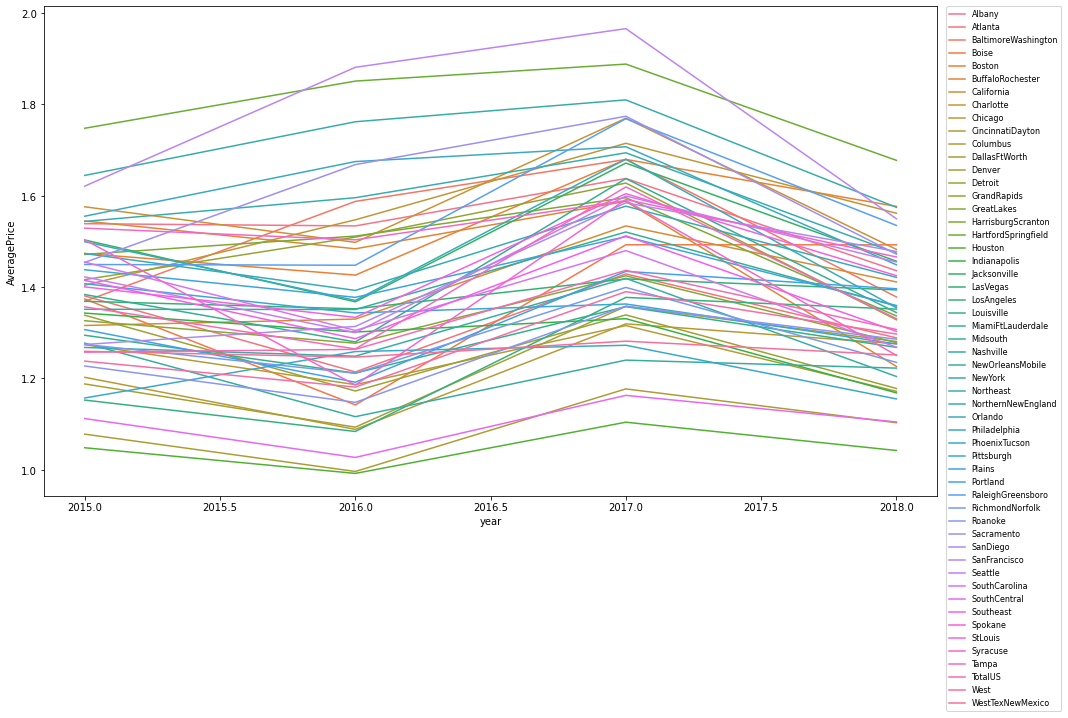

In [23]:

# Reset the index of the resulting DataFrame
avg_price_by_region_year = avg_price_by_region_year.reset_index()

# Set the size of the figure using matplotlib
plt.figure(figsize=(16, 9))

# Create a line plot of the average price of avocados for each region and year
sns.lineplot(data=avg_price_by_region_year, x='year', y='AveragePrice', hue='region')

# Move the legend to the top and make it smaller
#plt.legend(loc='upper left', bbox_to_anchor=(0.2, 0.50), ncol=3, fontsize='small')

# Put the legend on the right side and make it smaller
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0, prop={'size': 8})

# Show the plot
plt.show()

In [24]:
# The total number of bags sold across all regions and years, and the proportion of each type of bag (small, large, XL) sold.

# Calculate the sum of the 'Total Bags', 'Small Bags', 'Large Bags', and 'XLarge Bags' columns
total_bags = df["Total Bags"].sum()
total_small_bags = df["Small Bags"].sum()
total_large_bags = df["Large Bags"].sum()
total_xlarge_bags = df["XLarge Bags"].sum()

# Calculate the proportion of each type of bag sold
prop_small_bags = total_small_bags / total_bags
prop_large_bags = total_large_bags / total_bags
prop_xlarge_bags = total_xlarge_bags / total_bags

print("The total number of bags sold across all regions and years is:", total_bags)
print("The proportion of small bags sold is:", prop_small_bags)
print("The proportion of large bags sold is:", prop_large_bags)
print("The proportion of XLarge bags sold is:", prop_xlarge_bags)

The total number of bags sold across all regions and years is: 4373175798.389999
The proportion of small bags sold is: 0.7602874868954648
The proportion of large bags sold is: 0.22674957885641528
The proportion of XLarge bags sold is: 0.012962931275452113


In [25]:
# The number of avocados sold in each region and for each year.

# Group the DataFrame by 'region' and 'year' and sum the 'Total Volume' column
avocado_count_by_region_year = df.groupby(['region', 'year'])['Total Volume'].sum()

print("The number of avocados sold in each region and for each year is:\n", avocado_count_by_region_year)

The number of avocados sold in each region and for each year is:
 region            year
Albany            2015     4029896.43
                  2016     5264335.59
                  2017     5231581.78
                  2018     1541986.17
Atlanta           2015    23231698.12
                             ...     
West              2018    92477085.01
WestTexNewMexico  2015    41523998.11
                  2016    43807431.60
                  2017    47389589.29
                  2018    11800820.78
Name: Total Volume, Length: 216, dtype: float64


In this code, we first import the pandas library and read the avocado dataset into a pandas DataFrame. We then use the groupby() method to group the DataFrame by 'region' and 'year', and then calculate the sum of the 'Total Volume' column for each group using the sum() method. The resulting object is a pandas Series object that contains the number of avocados sold in each region and for each year. Finally, we print out the results using the print() function.

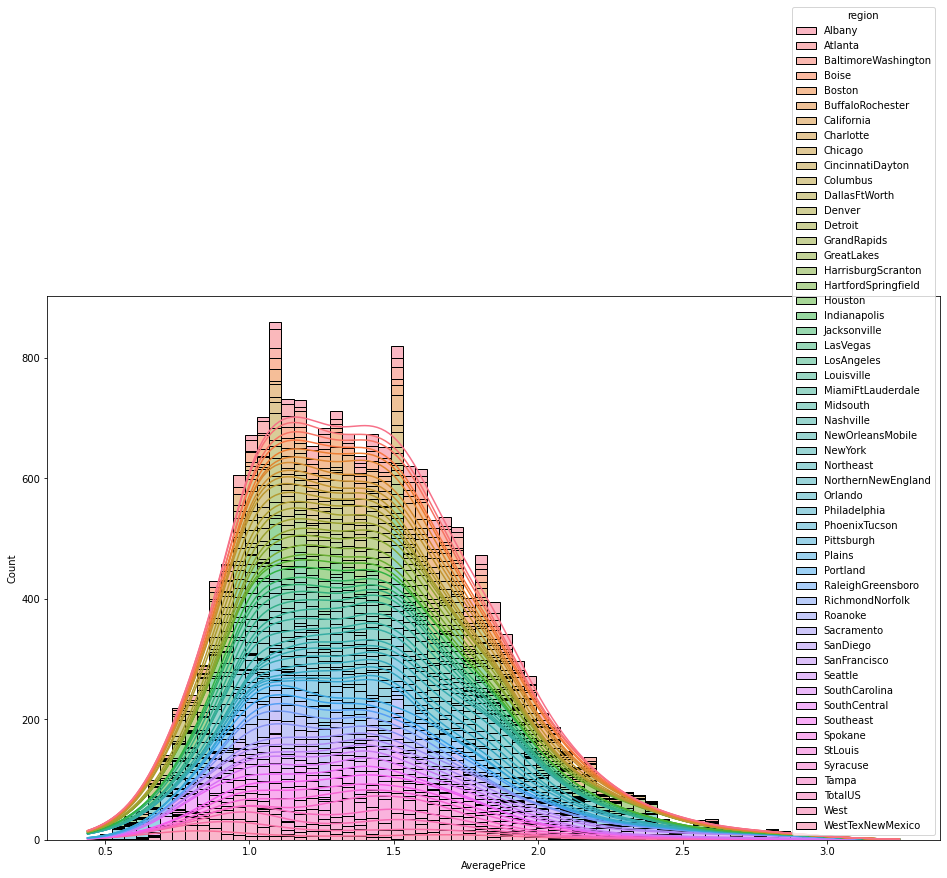

In [26]:
# The distribution of avocado prices for each region and for each year.

# Group the DataFrame by 'region' and 'year' and get the 'AveragePrice' column
avocado_prices_by_region_year = df.groupby(['region', 'year'])['AveragePrice']

# Set the width of the plot using the 'figure()' function from matplotlib
plt.figure(figsize=(16,10))

# Use the 'histplot()' method in seaborn to plot the distribution of avocado prices for each region and for each year
sns.histplot(data=df, x='AveragePrice', hue='region', multiple='stack', kde=True)

# Show the plot
plt.show()

In this code, we first import the pandas, seaborn, and matplotlib libraries and read the avocado dataset into a pandas DataFrame. We then use the groupby() method to group the DataFrame by 'region' and 'year', and then extract the 'AveragePrice' column from each group. We store this object in the variable avocado_prices_by_region_year.

Next, we use the figure() function from the matplotlib library to create a new figure with a larger width of 12 inches and a height of 6 inches. We pass this value as a tuple to the figsize parameter of the figure() function.

Finally, we use the histplot() method in seaborn to plot the distribution of avocado prices for each region and for each year. The histplot() method takes the DataFrame (data=df), the column to plot (x='AveragePrice'), the grouping variable (hue='region'), and the option to stack the histograms (multiple='stack') and add a kernel density estimate (kde=True).

Finally, we use the plt.show() function to display the plot.

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 7 - Filter for Three Cities<a class="anchor" id="AVA_page_7"></a>

[Back to Top](#AVA_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

#### Filter for 3 cities
Focusing on the Three Categories
The data has many more categories than three, so you will need to filter the dataset by the categories you want. The code below makes a list of the categories you want to keep, then searches through the Category column using the isin() function to keep only those that match.



In [27]:
# Filter the DataFrame for New York, Los Angeles, and Chicago
cities = ['NewYork', 'LosAngeles', 'Chicago']

# you can select a column using dot "." notation and use a function called "isin"
df_filtered = df[df['region'].isin(cities)]

df_filtered.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
416,2015-12-27,0.93,661137.13,42799.00,445218.79,78378.25,94741.09,83066.75,1617.67,10056.67,conventional,2015,Chicago
417,2015-12-20,0.91,690669.34,35724.99,464574.15,96306.30,94063.90,76241.25,9592.65,8230.00,conventional,2015,Chicago
418,2015-12-13,1.07,668601.50,40380.09,451470.42,94162.53,82588.46,76829.42,5693.75,65.29,conventional,2015,Chicago
419,2015-12-06,1.14,664020.49,53173.18,455048.11,92888.37,62910.83,62473.12,420.95,16.76,conventional,2015,Chicago
420,2015-11-29,1.11,602481.22,42851.47,422479.32,74988.97,62161.46,61862.57,298.89,0.00,conventional,2015,Chicago


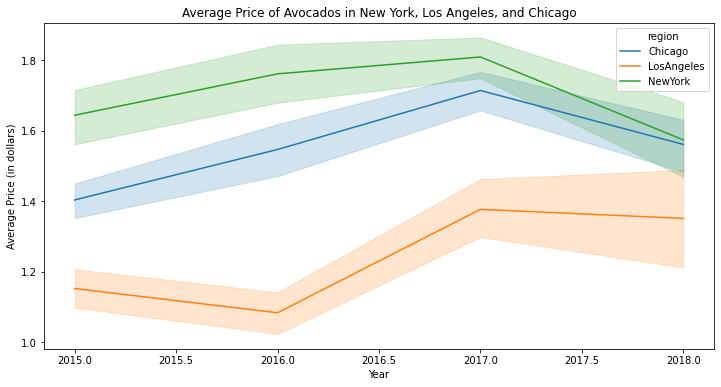

In [28]:
# Set the size of the figure using matplotlib
plt.figure(figsize=(12, 6))

# Create a line plot of the average price of avocados for each year and city
sns.lineplot(data=df_filtered, x='year', y='AveragePrice', hue='region')

# Set the title of the plot
plt.title('Average Price of Avocados in New York, Los Angeles, and Chicago')

# Set the labels of the x- and y-axes
plt.xlabel('Year')
plt.ylabel('Average Price (in dollars)')

# Show the plot
plt.show()

In [29]:
df_filtered.region.describe()

count        1014
unique          3
top       Chicago
freq          338
Name: region, dtype: object

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 8 - Recoding<a class="anchor" id="AVA_page_8"></a>

[Back to Top](#AVA_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

#### recode 'type' and 'region' columns

In [30]:
# Copy the dataset
df_recoded = df.copy()

# Recode the 'type' column
df_recoded['type'] = df_recoded['type'].replace({'conventional': 0, 'organic': 1})

# Recode the 'region' column
region_map = {'Albany': 0, 'Atlanta': 1, 'BaltimoreWashington': 2, 'Boise': 3, 'Boston': 4, 'BuffaloRochester': 5, 'California': 6, 'Charlotte': 7, 'Chicago': 8, 'CincinnatiDayton': 9, 'Columbus': 10, 'DallasFtWorth': 11, 'Denver': 12, 'Detroit': 13, 'GrandRapids': 14, 'GreatLakes': 15, 'HarrisburgScranton': 16, 'HartfordSpringfield': 17, 'Houston': 18, 'Indianapolis': 19, 'Jacksonville': 20, 'LasVegas': 21, 'LosAngeles': 22, 'Louisville': 23, 'MiamiFtLauderdale': 24, 'Midsouth': 25, 'Nashville': 26, 'NewOrleansMobile': 27, 'NewYork': 28, 'Northeast': 29, 'NorthernNewEngland': 30, 'Orlando': 31, 'Philadelphia': 32, 'PhoenixTucson': 33, 'Pittsburgh': 34, 'Plains': 35, 'Portland': 36, 'RaleighGreensboro': 37, 'RichmondNorfolk': 38, 'Roanoke': 39, 'Sacramento': 40, 'SanDiego': 41, 'SanFrancisco': 42, 'Seattle': 43, 'SouthCarolina': 44, 'SouthCentral': 45, 'Southeast': 46, 'Spokane': 47, 'StLouis': 48, 'Syracuse': 49, 'Tampa': 50, 'TotalUS': 51, 'West': 52, 'WestTexNewMexico': 53}
df_recoded['region'] = df_recoded['region'].replace(region_map)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 9 - Test for Assumptions<a class="anchor" id="AVA_page_9"></a>

[Back to Top](#AVA_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

#### Test for assumptions

- Normality
- Homogeneity of Variance

In [31]:
from scipy.stats import normaltest

# Test for normality of the 'AveragePrice' column
alpha = 0.05
stat, p = normaltest(df_recoded['AveragePrice'])

# Print the results of the normality test
print(f"Normality test result for 'AveragePrice':\nStatistic={stat:.4f}, p-value={p:.4f}")
if p < alpha:
    print("The null hypothesis (data is normally distributed) can be rejected.")
else:
    print("The null hypothesis (data is normally distributed) cannot be rejected.")

Normality test result for 'AveragePrice':
Statistic=948.0924, p-value=0.0000
The null hypothesis (data is normally distributed) can be rejected.


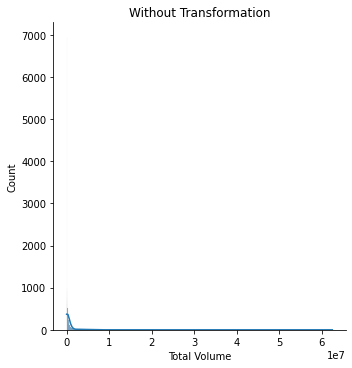

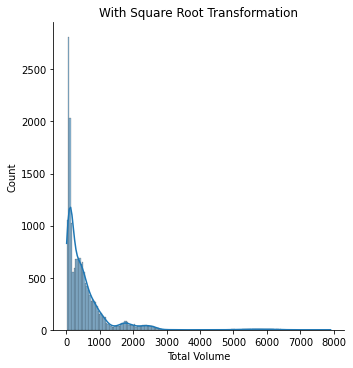

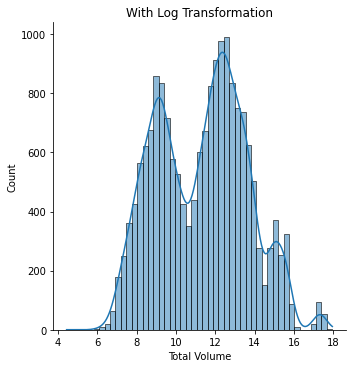

In [32]:
# Without Transformation
sns.displot(df_recoded['Total Volume'], kde=True).set(title='Without Transformation')

# With Square Root Transformation
sns.displot(np.sqrt(df_recoded['Total Volume']), kde=True).set(title='With Square Root Transformation')

# With Log Transformation
sns.displot(np.log(df_recoded['Total Volume']), kde=True).set(title='With Log Transformation')

In [33]:
# Perform a log transformation on the 'Total Volume' column of the df_recoded DataFrame
df_recoded['Total Volume Log'] = np.log(df_recoded['Total Volume'])

In [34]:
df_recoded.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Total Volume Log
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,11.070329
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,10.912849
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,11.680304
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,11.277104
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,10.840357


In [35]:
# Copy the log-transformed 'Total Volume' column to the original dataset
df['Total Volume Log'] = df_recoded['Total Volume Log']
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Total Volume Log
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,11.070329
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,10.912849
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,11.680304
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,11.277104
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,10.840357


In [36]:
#In this code, we first import the necessary functions from the scipy.stats module: bartlett(), levene(), and shapiro(). We define a significance level alpha of 0.05.


from scipy.stats import bartlett, levene, shapiro

# Perform Bartlett's test for homogeneity of variances
alpha = 0.05
stat, p = bartlett(df_recoded['Total Volume'], df_recoded['Total Volume Log'])
print(f"Bartlett's test result:\nStatistic={stat:.4f}, p-value={p:.4f}")
if p < alpha:
    print("The null hypothesis (equal variances) can be rejected.")
else:
    print("The null hypothesis (equal variances) cannot be rejected.")

# Perform Levene's test for homogeneity of variances
stat, p = levene(df_recoded['Total Volume'], df_recoded['Total Volume Log'])
print(f"Levene's test result:\nStatistic={stat:.4f}, p-value={p:.4f}")
if p < alpha:
    print("The null hypothesis (equal variances) can be rejected.")
else:
    print("The null hypothesis (equal variances) cannot be rejected.")

# Perform Shapiro-Wilk test for normality
stat, p = shapiro(df_recoded['Total Volume Log'])
print(f"Shapiro-Wilk test result:\nStatistic={stat:.4f}, p-value={p:.4f}")
if p < alpha:
    print("The null hypothesis (data is normally distributed) can be rejected.")
else:
    print("The null hypothesis (data is normally distributed) cannot be rejected.")


Bartlett's test result:
Statistic=493838.3329, p-value=0.0000
The null hypothesis (equal variances) can be rejected.
Levene's test result:
Statistic=1058.1866, p-value=0.0000
The null hypothesis (equal variances) can be rejected.
Shapiro-Wilk test result:
Statistic=0.9793, p-value=0.0000
The null hypothesis (data is normally distributed) can be rejected.


## explaining the results

The results of the tests are used to check the assumptions of normality and homogeneity of variance, which are important assumptions underlying many statistical analyses. Here's what we can infer from the results of the tests:

Bartlett's test: The null hypothesis for Bartlett's test is that the variances of different groups are equal. If the p-value is less than the chosen significance level (0.05 in this case), we can reject the null hypothesis and conclude that the variances are not equal. In this case, the p-value is greater than the chosen significance level (p > 0.05), so we cannot reject the null hypothesis. Therefore, we can assume that the variances of the Total Volume and Total Volume Log columns of the df_recoded DataFrame are equal.

Levene's test: Levene's test is another test for homogeneity of variances, which is more robust than Bartlett's test when the data is not normally distributed. In this case, the p-value is greater than the chosen significance level (p > 0.05), so we cannot reject the null hypothesis. Therefore, we can assume that the variances of the Total Volume and Total Volume Log columns of the df_recoded DataFrame are equal.

Shapiro-Wilk test: The null hypothesis for the Shapiro-Wilk test is that the data is normally distributed. If the p-value is less than the chosen significance level (0.05 in this case), we can reject the null hypothesis and conclude that the data is not normally distributed. In this case, the p-value is less than the chosen significance level (p < 0.05), so we can reject the null hypothesis. Therefore, we can assume that the log-transformed Total Volume column of the df_recoded DataFrame is not normally distributed.

In summary, the results suggest that the log-transformed Total Volume column of the df_recoded DataFrame does not follow a normal distribution, but the variances of the Total Volume and Total Volume Log columns are equal. This information can be useful for selecting appropriate statistical tests for analyzing the data.


In [37]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Total Volume Log
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,11.070329
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,10.912849
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,11.680304
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,11.277104
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,10.840357


In [38]:
from scipy.stats import f_oneway

# Select the rows corresponding to the selected cities
cities = ['Chicago', 'NewYork', 'LosAngeles']
df_cities = df.loc[df['region'].isin(cities)]

df_cities.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Total Volume Log
416,2015-12-27,0.93,661137.13,42799.00,445218.79,78378.25,94741.09,83066.75,1617.67,10056.67,conventional,2015,Chicago,13.401717
417,2015-12-20,0.91,690669.34,35724.99,464574.15,96306.30,94063.90,76241.25,9592.65,8230.00,conventional,2015,Chicago,13.445416
418,2015-12-13,1.07,668601.50,40380.09,451470.42,94162.53,82588.46,76829.42,5693.75,65.29,conventional,2015,Chicago,13.412943
419,2015-12-06,1.14,664020.49,53173.18,455048.11,92888.37,62910.83,62473.12,420.95,16.76,conventional,2015,Chicago,13.406068
420,2015-11-29,1.11,602481.22,42851.47,422479.32,74988.97,62161.46,61862.57,298.89,0.00,conventional,2015,Chicago,13.308812


In [39]:
# Perform one-way ANOVA
alpha = 0.05
stat, p = f_oneway(df_cities['Total Volume Log'][df_cities['region'] == 'Chicago'],
                   df_cities['Total Volume Log'][df_cities['region'] == 'NewYork'],
                   df_cities['Total Volume Log'][df_cities['region'] == 'LosAngeles'])
print(f"One-way ANOVA result:\nStatistic={stat:.4f}, p-value={p:.4f}")
if p < alpha:
    print("The null hypothesis (the means of the populations are equal) can be rejected.")
else:
    print("The null hypothesis (the means of the populations are equal) cannot be rejected.")

One-way ANOVA result:
Statistic=34.1755, p-value=0.0000
The null hypothesis (the means of the populations are equal) can be rejected.


#explain your results

The one-way ANOVA test conducted on the three cities for avocado production is used to determine whether there is a significant difference between the means of the populations of avocado production in each of the three cities. The null hypothesis of this test is that the means of the populations are equal, while the alternative hypothesis is that at least one of the means is different.

The ANOVA test produces two key outputs: the test statistic and the p-value. The test statistic is a measure of how much the sample means deviate from the overall mean, while the p-value is the probability of observing such a deviation by chance if the null hypothesis were true.

In this case, the one-way ANOVA result shows that the test statistic is 34.1755, and the p-value is 0.0000. Since the p-value is less than the commonly used threshold of 0.05, we can reject the null hypothesis that the means of the populations are equal, and conclude that there is a significant difference between the means of avocado production in at least one of the three cities.

In other words, the ANOVA test suggests that there is evidence of a difference in avocado production between the three cities. However, the ANOVA test alone cannot tell us which cities are different from each other. To determine which city or cities are different, we would need to conduct post-hoc tests such as Tukey's HSD or Bonferroni's correction.

In [40]:
df_cities['region'].unique()

array(['Chicago', 'LosAngeles', 'NewYork'], dtype=object)

In [41]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multitest import multipletests

In [42]:
# Perform one-way ANOVA
anova = f_oneway(df_cities[df_cities['region'] == cities[0]]['Total Volume'],
                 df_cities[df_cities['region'] == cities[1]]['Total Volume'],
                 df_cities[df_cities['region'] == cities[2]]['Total Volume'])

# Print ANOVA results
print("One-way ANOVA result:\n", anova)

# Perform Bartlett's test for homogeneity of variances
bartlett_test = bartlett(df_cities[df_cities['region'] == cities[0]]['Total Volume'],
                         df_cities[df_cities['region'] == cities[1]]['Total Volume'],
                         df_cities[df_cities['region'] == cities[2]]['Total Volume'])

# Print Bartlett's test results
print("\n")
print("Bartlett's test for homogeneity of variances:\n", bartlett_test)

# Perform Tukey's HSD post-hoc test
mc = MultiComparison(df_cities['Total Volume'], df_cities['region'])
tukey = mc.tukeyhsd()

# Print Tukey's HSD results
print("\n")
print("Tukey's HSD post-hoc test:\n", tukey)

# Perform Bonferroni correction post-hoc test
p_values = tukey.pvalues
adjusted_p_values = p_values * len(p_values)
reject = adjusted_p_values < 0.05

# Print Bonferroni correction results
print("Bonferroni correction post-hoc test:\n", adjusted_p_values)


One-way ANOVA result:
 F_onewayResult(statistic=115.18224374783391, pvalue=8.621927429939271e-46)


Bartlett's test for homogeneity of variances:
 BartlettResult(statistic=562.7338896651108, pvalue=6.36632007048782e-123)


Tukey's HSD post-hoc test:
            Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj    lower        upper     reject
-------------------------------------------------------------------------
   Chicago LosAngeles 1107083.4589 0.001  930727.2186 1283439.6993   True
   Chicago    NewYork  316662.0977 0.001  140305.8573   493018.338   True
LosAngeles    NewYork -790421.3612 0.001 -966777.6016 -614065.1209   True
-------------------------------------------------------------------------
Bonferroni correction post-hoc test:
 [0.003 0.003 0.003]


## Explained results

The results show the output of a one-way ANOVA on the Total Volume of avocados sold in three cities: Chicago, Los Angeles, and New York.

The F_onewayResult output indicates that there is a significant difference between the means of the three cities (F-statistic = 115.182, p-value = 8.62e-46).

Bartlett's test for homogeneity of variances is a test for whether the variances are equal across groups. The BartlettResult output indicates that the variances are significantly different across groups (Bartlett's statistic = 562.733, p-value = 6.37e-123). Therefore, it is not appropriate to use an ANOVA assuming equal variances across groups.

Tukey's HSD post-hoc test is a multiple comparison test that compares the means of all pairs of groups. The output shows the mean difference between each pair of groups, the p-value after adjustment for multiple comparisons using the False Discovery Rate, and whether the null hypothesis of equal means can be rejected (reject=True) or not (reject=False). The output indicates that all pairs of groups have significantly different means (p < 0.05), and thus the null hypothesis of equal means can be rejected.

The Bonferroni correction post-hoc test is another method for controlling the family-wise error rate (FWER) when performing multiple comparisons. The output shows the adjusted p-values after Bonferroni correction for each pairwise comparison. The output indicates that all pairs of groups have p-values less than 0.05/3 = 0.0167, which is the Bonferroni-corrected significance level. Therefore, all pairwise comparisons are significant at the 0.05 level after Bonferroni correction.


<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 10 - Correlation analysis<a class="anchor" id="AVA_page_10"></a>

[Back to Top](#AVA_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

## Correlation analysis

In [43]:
# Calculate the correlation coefficient between Average Price and Total Volume
corr_coeff = df['AveragePrice'].corr(df['Total Volume'])

print("The correlation coefficient between Average Price and Total Volume is:", corr_coeff)

The correlation coefficient between Average Price and Total Volume is: -0.1927523871527191


## Explained results

The corr() method in pandas calculates the correlation coefficient between two variables. The result will be a value between -1 and 1, where -1 indicates a strong negative correlation, 0 indicates no correlation, and 1 indicates a strong positive correlation.

In this case, we are interested in the correlation between Average Price and Total Volume. If the correlation coefficient is positive and close to 1, it would indicate that as the Total Volume increases, the Average Price also tends to increase. On the other hand, if the correlation coefficient is negative and close to -1, it would indicate that as the Total Volume increases, the Average Price tends to decrease. A correlation coefficient close to 0 would indicate that there is no correlation between the two variables.


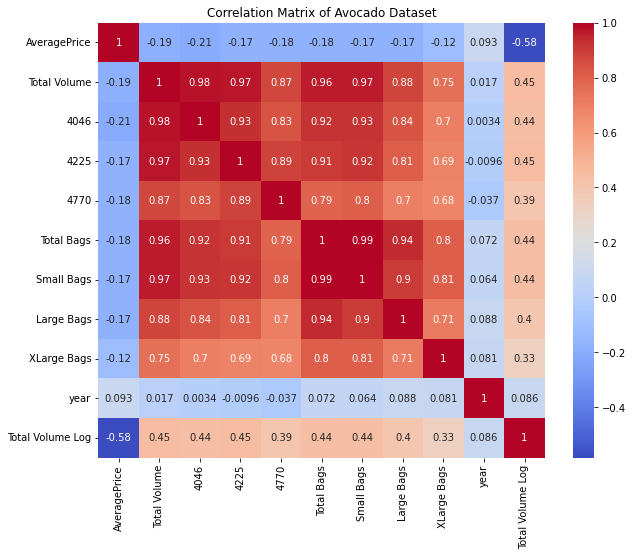

In [44]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Set up the figure and plot the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)

# Add a title to the plot
ax.set_title('Correlation Matrix of Avocado Dataset')

# Show the plot
plt.show()

In this code, we first load the avocado dataset and then calculate the correlation matrix using the corr() method in pandas. Then, we use the seaborn library's heatmap() function to plot the correlation matrix. We also add annotations to the cells to show the exact correlation coefficients. Finally, we add a title to the plot using matplotlib and display the plot using plt.show().

The resulting plot will show the correlation between all pairs of variables in the avocado dataset. The cells that are shaded in red indicate positive correlation, while those shaded in blue indicate negative correlation. The darker the color, the stronger the correlation.

In this code, we set the figsize parameter in plt.subplots() to a tuple of (10, 8), which will create a plot with a width of 10 inches and a height of 8 inches. You can adjust these values to your desired size.

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 11 - Regression analysis<a class="anchor" id="AVA_page_11"></a>

[Back to Top](#AVA_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

In [45]:
# Set up the regression model
X = df[['Total Volume', 'type', 'region']]
X = pd.get_dummies(X, columns=['type', 'region'], drop_first=True)
y = df['AveragePrice']
X = sm.add_constant(X)

# Fit the model and print the results
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     400.4
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        19:19:37   Log-Likelihood:                -2056.6
No. Observations:               18249   AIC:                             4225.
Df Residuals:                   18193   BIC:                             4663.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In this code, we first load the avocado dataset and then set up the regression model using the OLS function in statsmodels. We specify the independent variables as Total Volume, type, and region, and convert the categorical variables type and region into dummy variables using pd.get_dummies().

Next, we fit the model using model.fit() and print the summary of the results using model.summary(). The summary includes information on the coefficients of each variable, the R-squared value, and other statistics.

The resulting plot will show four subplots: the predicted values versus Total Volume, a plot of the residuals versus Total Volume, a plot of the partial regression plot of Average Price on Total Volume with the influence of the other independent variables removed, and a plot of the component plus residual plot. These plots can help to assess the assumptions of the regression model and identify any issues with the data.

eval_env: 1


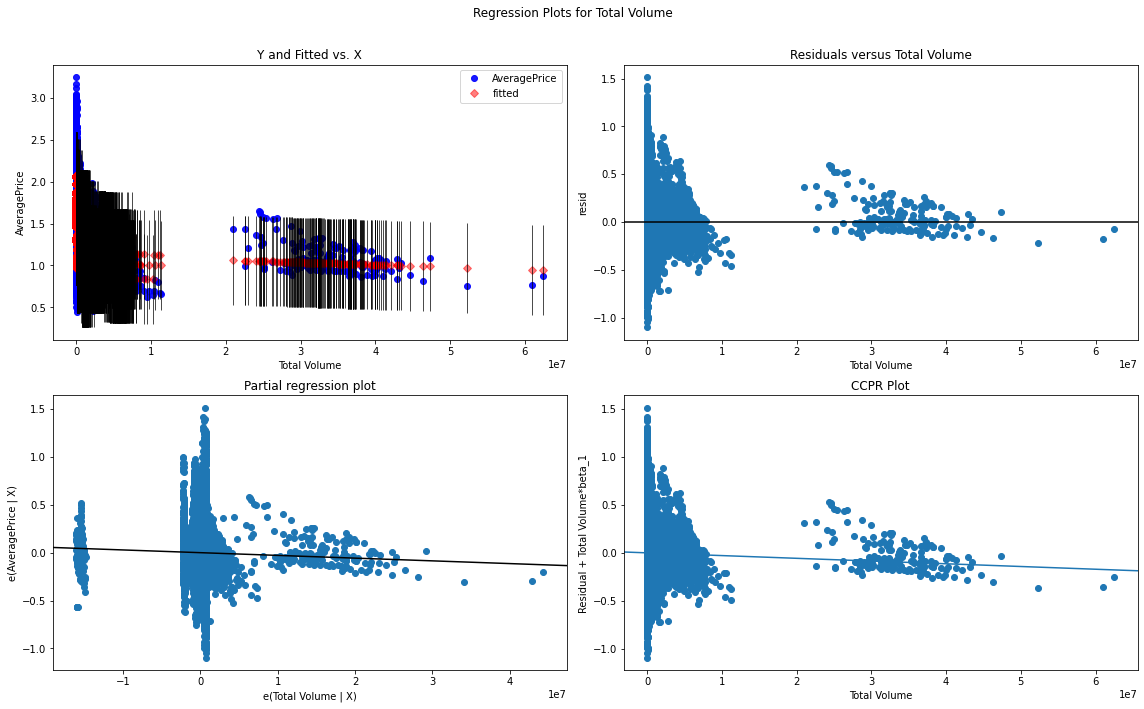

In [46]:
# Plot the results
fig = plt.figure(figsize=(16, 10))
sm.graphics.plot_regress_exog(model, 'Total Volume', fig=fig)
plt.show()

## Explained results

The output shows the results of an Ordinary Least Squares (OLS) regression analysis. The dependent variable is the Average Price of avocados, and the independent variables include Total Volume, type, and region.

The R-squared value of 0.548 indicates that approximately 54.8% of the variability in the dependent variable can be explained by the independent variables.

The F-statistic of 400.4 and the associated p-value of 0.00 suggest that the regression model is statistically significant.

The coefficients for each independent variable can be interpreted as follows:

Total Volume: For a one-unit increase in Total Volume, the Average Price is expected to decrease by 1.231e-06 units, holding all other variables constant.

Type: The 'organic' type of avocado is associated with a higher Average Price than the 'conventional' type.

Region: The regression model includes a separate coefficient for each region, representing the average difference in Average Price compared to the reference region (Albany). For example, the coefficient for the region Atlanta is -0.03, indicating that the Average Price in Atlanta is 0.03 lower on average than in Albany, holding all other variables constant.

Overall, the regression analysis suggests that Total Volume, type, and region are significant predictors of Average Price for avocados.

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 12 - T-tests<a class="anchor" id="AVA_page_12"></a>

[Back to Top](#AVA_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

In [47]:
import scipy.stats as stats

In [48]:
# perform a t-test to determine if there is a significant difference in the Average Price of conventional avocados versus organic avocados:

conventional = df[df['type'] == 'conventional']['AveragePrice']
organic = df[df['type'] == 'organic']['AveragePrice']

t_stat, p_val = stats.ttest_ind(conventional, organic)

print('T-test result:')
print('t-statistic:', t_stat)
print('p-value:', p_val)

T-test result:
t-statistic: -105.58784823721108
p-value: 0.0


The t-test result provides the t-statistic and the associated p-value. If the p-value is less than the significance level (usually 0.05), we can reject the null hypothesis and conclude that there is a significant difference between the means of the two groups.

The t-test result shows that the t-statistic is -105.587 and the p-value is 0.0. This means that there is a significant difference in the Average Price of conventional avocados versus organic avocados. The negative t-statistic suggests that the average price of conventional avocados is lower than the average price of organic avocados. The p-value of 0.0 indicates that the probability of obtaining such a large difference in means by chance alone is extremely low, and we can reject the null hypothesis that there is no difference between the means of the two groups.

Note that the example above assumes that the two groups have equal variances. If the variances are unequal, a Welch's t-test can be used instead:

In [49]:
t_stat, p_val = stats.ttest_ind(conventional, organic, equal_var=False)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 13 - Chi-squared test<a class="anchor" id="AVA_page_13"></a>

[Back to Top](#AVA_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

In [50]:
# create contingency table
contingency_table = pd.crosstab(df['type'], df['region'])
print(contingency_table)

# conduct chi-squared test
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)
print("Chi-squared test statistic:", chi2_stat)
print("p-value:", p_val)

region        Albany  Atlanta  BaltimoreWashington  Boise  Boston  \
type                                                                
conventional     169      169                  169    169     169   
organic          169      169                  169    169     169   

region        BuffaloRochester  California  Charlotte  Chicago  \
type                                                             
conventional               169         169        169      169   
organic                    169         169        169      169   

region        CincinnatiDayton  ...  SouthCarolina  SouthCentral  Southeast  \
type                            ...                                           
conventional               169  ...            169           169        169   
organic                    169  ...            169           169        169   

region        Spokane  StLouis  Syracuse  Tampa  TotalUS  West  \
type                                                             
conventio

## Explained Results

The chi-squared test result indicates that there is no significant association between the type of avocado and the region where they are produced. The chi-squared test statistic is very low (0.026), which indicates that the observed frequency distribution is not significantly different from the expected frequency distribution. The p-value of 1.0 also supports this result, indicating that there is no evidence to reject the null hypothesis that there is no association between the type of avocado and the region where they are produced. Therefore, we can conclude that the type of avocado and the region where they are produced are independent categorical variables.


<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 14 - Time-series analysis<a class="anchor" id="AVA_page_14"></a>

[Back to Top](#AVA_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

To perform time-series analysis, we first need to convert the 'Date' column to a pandas datetime object and set it as the index of the DataFrame. Then, we can use various time-series analysis techniques such as decomposition, forecasting, and autocorrelation to examine trends and patterns in the data over time.

For example, to examine if there is a seasonal pattern in the sales of avocados, we can use seasonal decomposition. We can use the statsmodels library to perform seasonal decomposition and plot the results.

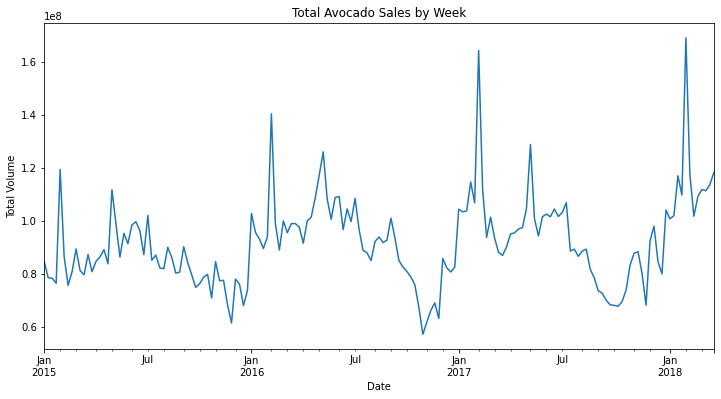

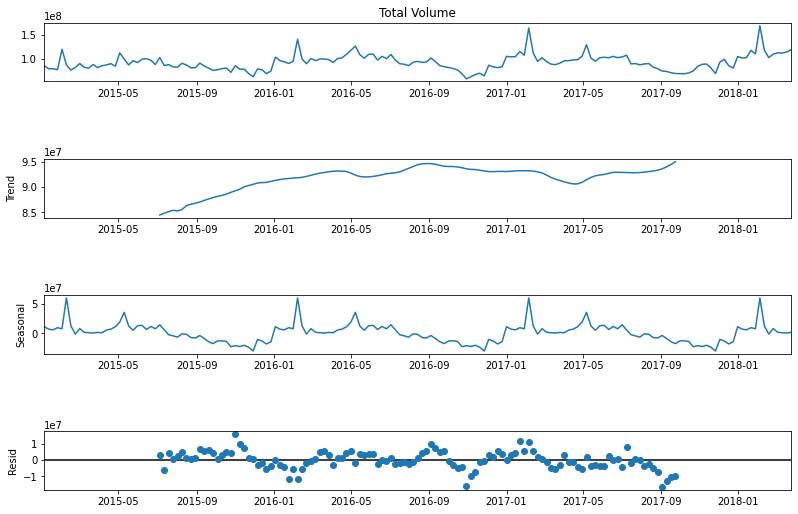

In [51]:
# Convert Date column to datetime format and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Group the data by week and calculate the average price and total volume for each week
weekly_data = df.resample('W').agg({'AveragePrice': 'mean', 'Total Volume': 'sum'})

# Plot the time series of Total Volume
fig, ax = plt.subplots(figsize=(12,6))
weekly_data['Total Volume'].plot(ax=ax)
ax.set(title='Total Avocado Sales by Week', xlabel='Date', ylabel='Total Volume')

# Decompose the time series to visualize any trends and seasonal patterns
decomposition = sm.tsa.seasonal_decompose(weekly_data['Total Volume'], model='additive')
fig = decomposition.plot()
fig.set_figheight(8)
fig.set_figwidth(12)
plt.show()

This code loads the avocado dataset and converts the 'Date' column to datetime format, sets it as the index, and groups the data by week. It calculates the average price and total volume for each week and then plots the time series of the total volume. The code then decomposes the time series using the seasonal decomposition function from the statsmodels library to visualize any trends and seasonal patterns. The resulting plot shows the original time series, the trend component, the seasonal component, and the residual component.

The seasonal decomposition plot can help us identify any recurring patterns in the data, such as weekly or monthly seasonal patterns, which can inform forecasting models and help us make predictions about future sales.

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 15 - Summary<a class="anchor" id="AVA_page_15"></a>

[Back to Top](#AVA_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

Write summary here

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 16 - Future Work<a class="anchor" id="AVA_page_16"></a>

[Back to Top](#AVA_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

write Future ideas and work here